In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from numpy import arange, hstack, meshgrid
import math
import copy

In [48]:
def load_data(file_path='data.txt'):
    with open(file_path, 'r', encoding='utf-8-sig') as file:
        lines = file.readlines()

    data = []
    for line in lines:
        values = line.strip().split(',')
        values = [float(val) if i != 2 else int(val) for i, val in enumerate(values)]
        data.append(values)

    X_train = np.array(data)
    y_train = X_train[:, -1]
    X_train = X_train[:, :-1]

    return X_train, y_train

In [49]:
X_train, y_train = load_data()

In [50]:
def visualize_data(X_train, y_train):
    y_df = pd.DataFrame(y_train, columns=["class"])
    X_df = pd.DataFrame(X_train, columns=['x1', 'x2'])
    frames = [X_df, y_df]
    data = pd.concat(frames, axis=1)

    sns.scatterplot(x="x1", y="x2", hue='class', data=data)
    plt.show()

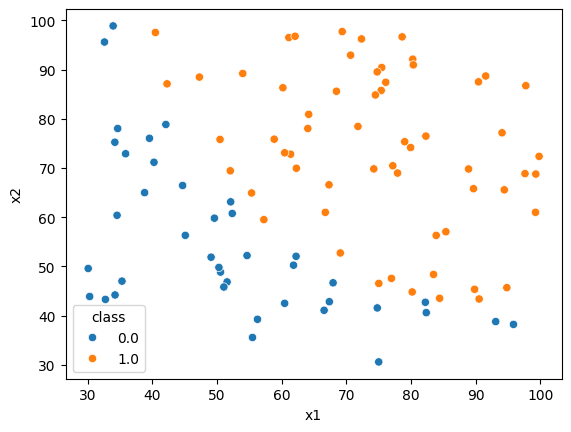

In [51]:
visualize_data(X_train, y_train)

In [52]:
def train_logistic_regression(X, y):
    model = LogisticRegression()
    model.fit(X, y)
    return model

In [53]:
def evaluate_and_plot(model, X, y):
    yhat = model.predict(X)
    acc = accuracy_score(y, yhat)
    print('Accuracy: %.3f' % acc)

    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)
    xx, yy = meshgrid(x1grid, x2grid)
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    grid = hstack((r1, r2))
    yhat = model.predict(grid)
    zz = yhat.reshape(xx.shape)

    fig, ax = plt.subplots(1, 1, figsize=(7, 5))
    plt.contourf(xx, yy, zz, cmap='Paired', alpha=0.5)

    pos = y == 1
    neg = y == 0
    ax.scatter(X[pos, 0], X[pos, 1], marker='x', s=80, c='red', label="y=1")
    ax.scatter(X[neg, 0], X[neg, 1], marker='o', s=80, label="y=0", facecolors='none', edgecolors='#0096ff', lw=3)
    ax.legend(loc='best')

    plt.show()


In [54]:
def sigmoid(z):
    z = np.clip(z, -500, 500)
    g = 1.0 / (1.0 + np.exp(-z))
    return g

def compute_cost_logistic(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    epsilon = 1e-5
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        cost += -y[i] * np.log(f_wb_i + epsilon) - (1 - y[i]) * np.log(1 - f_wb_i + epsilon)

    cost = cost / m
    return cost

def compute_gradient_logistic(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i], w) + b)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i, j]
        dj_db = dj_db + err_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [55]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    J_history = []
    w = np.copy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        J_history.append(compute_cost_logistic(X, y, w, b))

        if i % max(1, num_iters // 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}")

    return w, b, J_history


In [56]:
def plot_decision_boundary(X, y, w, b):
    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)
    xx, yy = meshgrid(x1grid, x2grid)
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    grid = hstack((r1, r2))
    yhat = model.predict(grid)
    zz = yhat.reshape(xx.shape)

    fig, ax = plt.subplots(1, 1, figsize=(7, 5))
    plt.contourf(xx, yy, zz, cmap='Paired', alpha=0.5)

    pos = y == 1
    neg = y == 0
    ax.scatter(X[pos, 0], X[pos, 1], marker='x', s=80, c='red', label="y=1")
    ax.scatter(X[neg, 0], X[neg, 1], marker='o', s=80, label="y=0", facecolors='none', edgecolors='#0096ff', lw=3)
    ax.legend(loc='best')

    x0 = np.arange(0, 4)
    x1 = (-b - w[0] * x0) / w[1]
    ax.plot(x0, x1, c='green', label="Decision Boundary")

    plt.legend(loc="best")
    plt.show()


Accuracy: 0.890


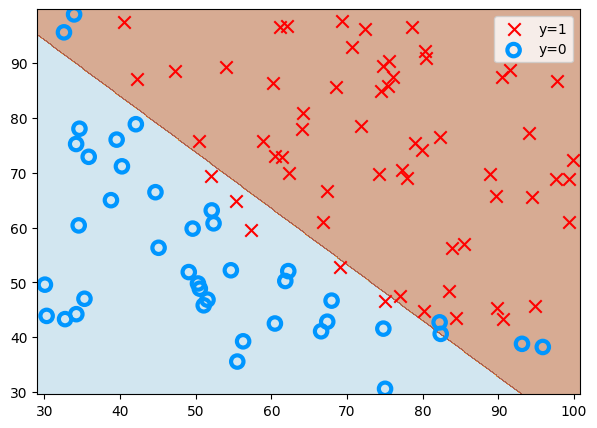

Iteration    0: Cost (0.4, array([20.81292044, 21.84815684]))
Iteration 1000: Cost (-0.5699227173708956, array([-42.18435852, -43.2941395 ]))
Iteration 2000: Cost (0.4, array([20.81292044, 21.84815684]))
Iteration 3000: Cost (0.38000216268516945, array([20.14806615, 19.90368929]))
Iteration 4000: Cost (-0.5698428247867124, array([-42.17670295, -43.2904194 ]))
Iteration 5000: Cost (0.4, array([20.81292044, 21.84815684]))
Iteration 6000: Cost (0.39987881105409584, array([20.80896141, 21.8365444 ]))
Iteration 7000: Cost (-0.5462660951793573, array([-40.00798061, -42.24094212]))
Iteration 8000: Cost (0.4, array([20.81292044, 21.84815684]))
Iteration 9000: Cost (0.3947729302348116, array([20.64217404, 21.34732471]))


In [46]:
model = train_logistic_regression(X_train, y_train)

# Evaluate and plot decision boundaries using scikit-learn
evaluate_and_plot(model, X_train, y_train)

# Perform gradient descent
w_tmp = np.zeros_like(X_train[0])
b_tmp = 0.
alpha = 0.1
iterations = 10000

w_out, b_out, cost_history = gradient_descent(X_train, y_train, w_tmp, b_tmp, alpha, iterations)
